In [2]:
from model import *
from data import *

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [4]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,r'C:\Users\kshitij\Downloads\unet-master\data\membrane\train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint(r'C:\Users\kshitij\Downloads\unet-master\unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=1,callbacks=[model_checkpoint])

Epoch 1/1
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
2000/2000 [==============================] - 11803s 6s/step - loss: 0.2521 - accuracy: 0.9097

Epoch 00001: loss improved from inf to 0.25209, saving model to C:\Users\kshitij\Downloads\unet-master\unet_membrane.hdf5


### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [3]:
testGene = testGenerator(r"C:\Users\kshitij\Downloads\unet-master\data\membrane\test")
model = unet()
model.load_weights(r"C:\Users\kshitij\Downloads\unet-master\unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult(r"C:\Users\kshitij\Downloads\unet-master\data\membrane\test",results)

C:\Users\kshitij\Downloads\unet-master\model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


30/30 [==============================] - 13s 424ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Populating the interactive namespace from numpy and matplotlib


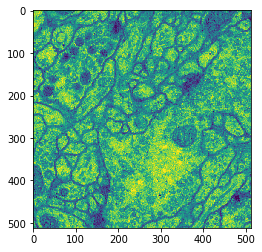

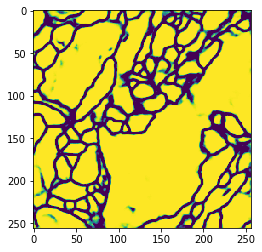

In [4]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1=mpimg.imread(r'C:\Users\kshitij\Downloads\unet-master\data\membrane\test\0.png')
img2=mpimg.imread(r'C:\Users\kshitij\Downloads\unet-master\data\membrane\test\0_predict.png')
imgplot=plt.imshow(img1)
plt.show()
imgplot=plt.imshow(img2)
plt.show()